In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=b81f96997b27e9af4ba1012d1147276a6fb6e37417584c43d70cb943ab6f6c74
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
import wget

url = 'ftp://ftp.ebi.ac.uk/pub/databases/Pfam/current_release/Pfam-A.clans.tsv.gz'
filename = './Pfam-A.clans.tsv.gz'

wget.download(url, filename)

'./Pfam-A.clans.tsv.gz'

In [ ]:
pfam_df = pd.read_csv('Pfam-A.clans.tsv.gz', delimiter='\t', on_bad_lines='skip')
full_df = pfam_df
pfam_df = pfam_df.iloc[:2000]

The order in which the search tries the various types of ID and accession is given below:
+ Pfam A accession, e.g. PF02171
+ Pfam A identifier, e.g. piwi
+ UniProt sequence ID, e.g. CANX_CHICK
+ NCBI “GI” number, e.g. 113594566
+ NCBI secondary accession, e.g. BAF18440.1
+ Pfam clan accession, e.g. CL0005
+ metaseq ID, e.g. JCVI_ORF_1096665732460
+ metaseq accession, e.g. JCVI_PEP_1096665732461
+ Pfam clan accession, e.g. CL0005
+ Pfam clan ID, e.g. Kazal
+ PDB entry, e.g. 2abl
+ Proteome species name, e.g. Homo sapiens

source: https://pfam-docs.readthedocs.io/_/downloads/en/latest/pdf/


In [ ]:
G = nx.Graph()

In [ ]:
for index, row in pfam_df.iterrows():
    G.add_node(row['PF00001'])

In [ ]:
for index, row in pfam_df.iterrows():
    clan = row['CL0192']
    members = pfam_df[pfam_df['CL0192'] == clan]['PF00001'].tolist()
    for i in range(len(members)):
        for j in range(i+1, len(members)):
            G.add_edge(members[i], members[j])

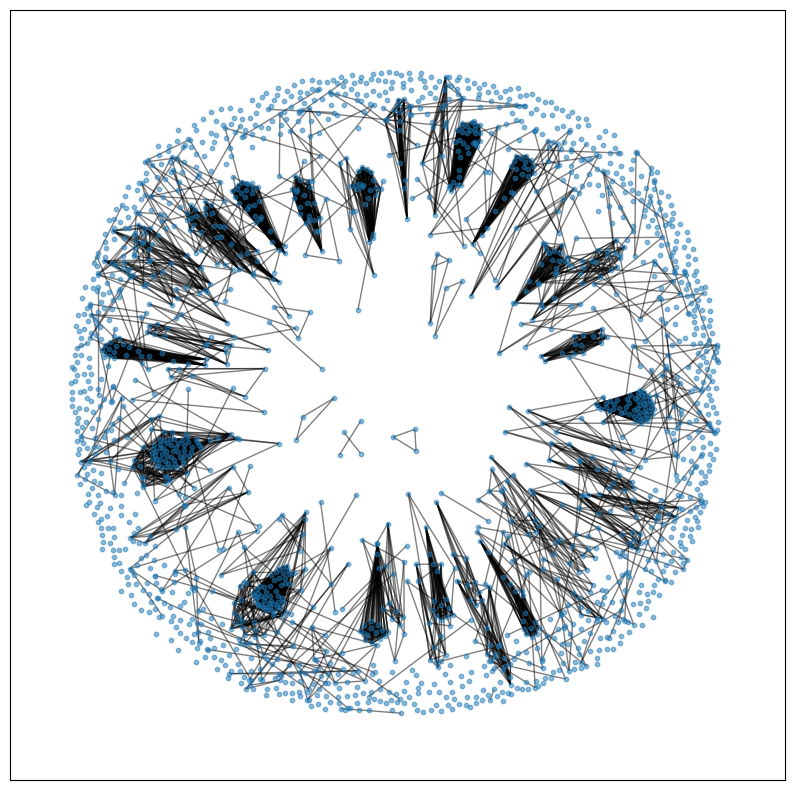

In [ ]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.2)
nx.draw_networkx_nodes(G, pos, node_size=10, alpha=0.5)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
print('Average node connectivity: ', nx.average_node_connectivity(G))

Degree centrality: {'PF00002': 0.0035017508754377185, 'PF00003': 0.0035017508754377185, 'PF00004': 0.02451225612806403, 'PF00005': 0.02451225612806403, 'PF00006': 0.02451225612806403, 'PF00007': 0.0025012506253126563, 'PF00008': 0.002001000500250125, 'PF00009': 0.02451225612806403, 'PF00010': 0.0, 'PF00011': 0.0, 'PF00012': 0.004502251125562781, 'PF00013': 0.0, 'PF00014': 0.0, 'PF00015': 0.0, 'PF00016': 0.0, 'PF00017': 0.0, 'PF00018': 0.0010005002501250625, 'PF00019': 0.0025012506253126563, 'PF00020': 0.0, 'PF00021': 0.0010005002501250625, 'PF00022': 0.004502251125562781, 'PF00023': 0.0, 'PF00024': 0.0, 'PF00025': 0.02451225612806403, 'PF00026': 0.0005002501250625312, 'PF00027': 0.003001500750375187, 'PF00028': 0.011005502751375688, 'PF00029': 0.0010005002501250625, 'PF00030': 0.0, 'PF00031': 0.0005002501250625312, 'PF00032': 0.0, 'PF00033': 0.0015007503751875936, 'PF00034': 0.0, 'PF00035': 0.0005002501250625312, 'PF00036': 0.0015007503751875936, 'PF00037': 0.0, 'PF00038': 0.0, 'PF0003

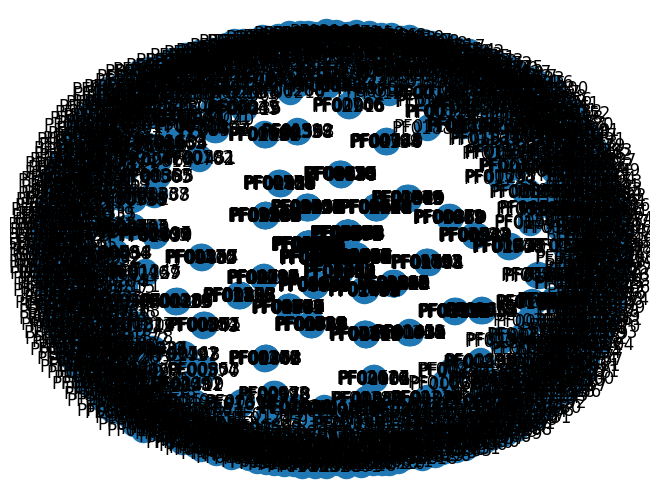

In [ ]:
import matplotlib.pyplot as plt

# Degree centrality
deg_centrality = nx.degree_centrality(G)
print("Degree centrality:", deg_centrality)

# Betweenness centrality
bet_centrality = nx.betweenness_centrality(G)
print("Betweenness centrality:", bet_centrality)

# Clustering coefficient
clustering_coef = nx.clustering(G)
print("Clustering coefficient:", clustering_coef)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


The database is structured in a hierarchical manner, with each family belonging to a larger clan, which in turn belongs to a superfamily.

At the highest level, the Pfam database is divided into five main categories: protein domains, repeats, families, clans, and genomes.

+ Protein domains: These are the basic structural and functional units of proteins, and are defined as regions of a protein that can evolve and function independently from the rest of the protein. Each domain is assigned a unique Pfam identifier (PFxxxxx).

+ Repeats: Some protein domains contain repeated sequences, and these are organized into repeat families. Each repeat family is assigned a unique Pfam identifier (RFxxxxx).

+ Families: Pfam families consist of a group of related protein domains or repeats that share significant sequence similarity and a common function or structure. Each family is assigned a unique Pfam identifier (PFxxxxx).

+ Clans: Clans are groups of related Pfam families that share significant sequence similarity and are believed to have a common evolutionary origin. Each clan is assigned a unique identifier (CLxxxxx).

+ Genomes: Pfam also provides pre-calculated genome-wide annotations of Pfam domains for several thousand genomes, including model organisms and pathogens.



The functional information in PFAM can include:

+ Protein family name
+ Accession number: Unique identifier for each entry in the Pfam database.
+ Description of the family
+ Number of sequences in the family
+ Conserved domain architecture
+ HMM logo
+ Alignment of the family
+ Conservation scores
+ Secondary structure prediction
+ Protein 3D structure visualization
+ Gene ontology (GO) annotations
+ Literature references
+ Cross-references to other databases
+ Function: Predicted or experimentally-determined functions associated with the family or domain.
+ Ontology: Gene Ontology terms associated with members of the family or domain.

In [ ]:
# download the pfam dataset

import wget

url = 'ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam34.0/Pfam-A.full.gz'
filename = './Pfam-A.full.gz'

wget.download(url, filename)

'./Pfam-A.full.gz'

In [ ]:
# !wget ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam34.0/Pfam-A.fasta.gz
# !gunzip Pfam-A.fasta.gz
# !pip install biopython

from Bio import SeqIO

pfam_file = "Pfam-A.fasta"
pfam_records = list(SeqIO.parse(pfam_file, "fasta"))

print("Loaded", len(pfam_records), "sequences from Pfam.")

In [ ]:
!pip install biopython==1.71


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Bio import SeqIO, Entrez

# Retrieving protein sequences using the web version of BLAST


# retrive the sequence

#Setting up your email to be able to use Entrez
Entrez.email = 'riccardo.tedoldi@studenti.unitn.it'

#Here, we set up a temporary handle with our downloaded sequence in fasta format
temp = Entrez.efetch(db="protein",rettype="fasta",id="2KIU_A")

#Reading the sequence information as a string in fasta format
aaseq = SeqIO.read(temp, format="fasta")

#Creating a fasta file to write our downloaded sequence
aaseq_out = open("2KIU_A.fasta",'w')

#Writing the sequence record in fasta format
SeqIO.write(aaseq,aaseq_out,"fasta")

#Closing both the temp handle and the FASTA file
temp.close()
aaseq_out.close()

In [ ]:
# print the mesurement of the sequance

print('Sequence lenght: ',len(aaseq))
print('Description: ',aaseq.description)
print('ID: ',aaseq.id)
print('Sequence: ',aaseq.seq)

Sequence lenght:  87
Description:  pdb|2KIU|A Chain A, Forkhead box protein P1
ID:  pdb|2KIU|A
Sequence:  AEVRPPFTYASLIRQAILESPEKQLTLNEIYNWFTRMFPYFRRNAATWKNAVRHNLSLHKYFVRVENVKGAVWTVDEVEFQKRRPQK


In [ ]:
# How produce an object sequence
from Bio.Seq import Seq
my_seq = Seq("AEVRPPFTYASLIRQAILESPEKQLTLNEIYNWFTRMFPYFRRNAATWKNAVRHNLSLHKYFVRVENVKGAVWTVDEVEFQKRRPQK")